In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.optimizers import Adam
import numpy as np

train = "Data/readelf/12/train_dataset.npz"
val = "Data/readelf/12/val_dataset.npz"
test = "Data/readelf/12/test_dataset.npz"

# Load numpy array
training_dataset = np.load(train)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = training_dataset['x'][:5120]
y_train = training_dataset['y'][:5120]

x_val = val_dataset['x'][:992]
y_val = val_dataset['y'][:992]

x_test = test_dataset['x']
y_test = test_dataset['y']

print("No. of seed files collected: 112")
print("Data collection of XY simulated to 2% sampling rate, Dataset split: 87/20/5")
samples, timesteps, chunksize = x_train.shape
print("No. of training samples: " + str(samples) + ", No. of timesteps: " + str(timesteps) + ", Chunksize: " + str(chunksize))
print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, y_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


No. of seed files collected: 112
Data collection of XY simulated to 2% sampling rate, Dataset split: 87/20/5
No. of training samples: 5120, No. of timesteps: 2560, Chunksize: 64
Training shape:  (5120, 2560, 64) (5120, 2560, 64)
Validation shape:  (992, 2560, 64) (992, 2560, 64)
Test shape:  (239, 2560, 64) (239, 2560, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(2560, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error')

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2560, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 5120 samples, validate on 992 samples
Epoch 1/100
5120/5120 [==============================] - 618s 121ms/step - loss: 0.0891 - val_loss: 0.0713
Epoch 2/100
5120/5120 [==============================] - 628s 123ms/step - loss: 0.0731 - val_loss: 0.0627
Epoch 3/100
5120/5120 [==============================] - 635s 124ms/step - loss: 0.0663 - val_loss: 0.0579
Epoch 4/100
5120/5120 [==============================] - 633s 124ms/step - loss: 0.0621 - val_loss: 0.0545
Epoch 5/100
5120/5120 [==============================] - 624s 122ms/step - loss: 0.0589 - val_loss: 0.0519
Epoch 6/100
5120/5120 [==============================] - 617s 121ms/step - loss: 0.0

5120/5120 [==============================] - 615s 120ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 73/100
5120/5120 [==============================] - 613s 120ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 74/100
5120/5120 [==============================] - 610s 119ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 75/100
5120/5120 [==============================] - 613s 120ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 76/100
5120/5120 [==============================] - 616s 120ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 77/100
5120/5120 [==============================] - 615s 120ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 78/100
5120/5120 [==============================] - 616s 120ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 79/100
5120/5120 [==============================] - 616s 120ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 80/100
5120/5120 [==============================] - 615s 120ms/step - loss: 0.0413 - val_loss: 0.0361
Epoch 81/100
5120/5120 [=================

In [3]:
# Save the model
model.save("/home/isa/FYPJ/Model/model_final.h5")

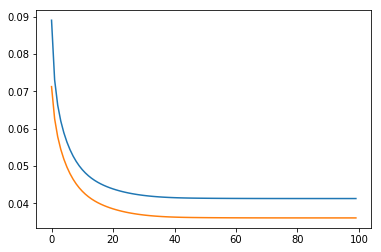

In [4]:
from matplotlib import pyplot
%matplotlib inline

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [5]:
test_loss = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)

239/239 [==============================] - 7s 29ms/step
Test loss: 0.04077609654157481


In [6]:
predictions = model.predict(x_test)
print("View some predictions of some chunks")
print(predictions[0][0])
print(predictions[0][1])
print(predictions[0][2])
print(predictions[1][0])
print(predictions[1][1])
print(predictions[1][2])
print(predictions[13][0])
print(predictions[13][1])
print(predictions[13][2])

View some predictions of some chunks
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.]
[-2.60037632e-06 -1.22511096e-06  9.84580083e-07 -7.97806820e-07
  3.46744628e-06 -8.91832656e-07  3.40134051e-07  1.42182373e-07
  1.78359039e-06  8.16317595e-07 -8.78932894e-07 -1.37469260e-06
 -1.68187597e-07  9.31696491e-07  6.38510016e-07  2.00424984e-06
 -2.33852415e-06 -7.92758158e-07  6.65491541e-07  1.39257239e-07
  9.74656177e-06  3.04683624e-07  2.22545509e-06 -1.05559877e-06
  1.77209097e-06  2.43739282e-06  7.45037767e-07  3.01715045e-06
 -1.62907850e-06  1.75009507e-06  1.14404941e-06 -3.90147591e-07
 -5.83277426e-07  1.72423120e-06 -1.78731148e-06  1.60753314e-06
 -3.89487241e-07  9.20611996e-08  1.30267267e-06 -3.19264086e-06
  7.25866158e-08  5.93389927e-07  2.11557477e-07  6.